<font size=3 >Load the required libraries.</font>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from pandas import DataFrame
import matplotlib.style as style
import seaborn as sns
import itertools
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.pipeline import Pipeline
from kmodes import kmodes
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA
%matplotlib inline

In [9]:
# Read Data form local file path
application_drop_df = pd.read_csv("application_drop_df.csv")

In [10]:
# Display the first five rows of data
application_drop_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_YEAR
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,...,0.0,0.0,0.0,1.0,200k-300k,400k-500k,25,20-30,1,0-5
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5
2,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,...,0.0,0.0,0.0,0.0,0-100K,100K-200K,52,50 above,0,None
3,100006,0,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,...,0.0,0.0,0.0,1.0,100K-200K,300k-400k,52,50 above,8,5-10
4,100007,0,Cash loans,M,N,Y,0,1.215,5.130000,21865.5,...,0.0,0.0,0.0,0.0,100K-200K,500k-600k,54,50 above,8,5-10


In [11]:
# Check the columns information
application_drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [12]:
#Conversion of Object acolumns to Categorical Columns
categorical_list = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','AMT_INCOME_RANGE' ,'AMT_CREDIT_RANGE','AGE_GROUP','EMPLOYMENT_YEAR',
                      ]
for col in categorical_list:
    application_drop_df[col] =pd.Categorical(application_drop_df[col])

In [13]:
# Check the columns information
application_drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [14]:
application_drop_df.isnull().sum().sort_values(ascending=False)

AMT_ANNUITY                    12
CNT_FAM_MEMBERS                 2
DAYS_LAST_PHONE_CHANGE          1
SK_ID_CURR                      0
FLAG_DOCUMENT_3                 0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
ORGANIZATION_TYPE               0
OBS_30_CNT_SOCIAL_CIRCLE        0
DEF_30_CNT_SOCIAL_CIRCLE        0
OBS_60_CNT_SOCIAL_CIRCLE        0
DEF_60_CNT_SOCIAL_CIRCLE        0
AMT_REQ_CREDIT_BUREAU_HOUR      0
REG_REGION_NOT_LIVE_REGION      0
AMT_REQ_CREDIT_BUREAU_DAY       0
AMT_REQ_CREDIT_BUREAU_WEEK      0
AMT_REQ_CREDIT_BUREAU_MON       0
AMT_REQ_CREDIT_BUREAU_QRT       0
AMT_REQ_CREDIT_BUREAU_YEAR      0
AMT_INCOME_RANGE                0
AMT_CREDIT_RANGE                0
AGE                             0
AGE_GROUP                       0
YEARS_EMPLOYED                  0
REG_REGION_NOT_WORK_REGION      0
HOUR_APPR_PROCESS_START         0
TARGET                          0
WEEKDAY_APPR_P

In [15]:
application_drop_df['AMT_ANNUITY'].fillna(0,inplace = True)
application_drop_df['CNT_FAM_MEMBERS'].fillna(0,inplace = True)
application_drop_df['DAYS_LAST_PHONE_CHANGE'].fillna(0,inplace = True)

<font size=3 >I plan to drop some unnecessary columns, leaving the attributes needed to fit the model.</font>

In [16]:
# Pick out numeric attributes in application data
numerical_df = application_drop_df.select_dtypes(include=('int64','float64'))

In [17]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   CNT_CHILDREN                307511 non-null  int64  
 3   AMT_INCOME_TOTAL            307511 non-null  float64
 4   AMT_CREDIT                  307511 non-null  float64
 5   AMT_ANNUITY                 307511 non-null  float64
 6   AMT_GOODS_PRICE             307511 non-null  float64
 7   REGION_POPULATION_RELATIVE  307511 non-null  float64
 8   DAYS_BIRTH                  307511 non-null  int64  
 9   DAYS_EMPLOYED               307511 non-null  int64  
 10  DAYS_REGISTRATION           307511 non-null  float64
 11  DAYS_ID_PUBLISH             307511 non-null  int64  
 12  CNT_FAM_MEMBERS             307511 non-null  float64
 13  HOUR_APPR_PROC

In [18]:
numerical_list = numerical_df.columns.values.tolist()

In [19]:
print(numerical_list)

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YEARS_EMPLOYED']


In [20]:
remove_list = ['TARGET']
for item in remove_list:
    numerical_list.remove(item)
print(numerical_list)

['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YEARS_EMPLOYED']


In [21]:
# Drop unnecessary columns
column_drop_list = numerical_list
application_train_df = application_drop_df.drop(columns=column_drop_list)
application_train_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE_GROUP,EMPLOYMENT_YEAR
0,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0,0,0,Business Entity Type 3,200k-300k,400k-500k,20-30,0-5
1,0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,...,0,0,0,0,0,School,200k-300k,1M Above,40-50,0-5
2,0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0,0,0,Government,0-100K,100K-200K,50 above,None
3,0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,...,0,0,0,0,0,Business Entity Type 3,100K-200K,300k-400k,50 above,5-10
4,0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0,1,1,Religion,100K-200K,500k-600k,50 above,5-10


5.Building Predictive Models with Random Forests
---

In [22]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    # Parameters:
    # 1、 estimator - prediction model object
    # 2、 title - The title of the diagram
    # 3、 X - training dataset
    # 4、 y - label dataset
    # 5、 ylim - the range of y axis
    # 6、 cv - the number of cross-validation
    # 7、 training_sizes - the pct of the total training samples
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # mean and std score of both train and test dataset
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Detail setting
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<font size=3 >Because defaulters make up only a small percentage of all applicants. The goal of our analysis is to identify loan defaulters and minimize the risk of losing funds, so we cannot simply take accuracy (predicted correct samples/total samples) as an evaluation metric.</font>

<font size=3 >I need a metric to select the model with the lowest false positive rate when all models have the same true positive rate. Under this premise, "ROC_AUC_SCORE" would be a good choice.</font>


In [23]:
# Split the train_df
features_df = application_train_df.drop('TARGET', axis=1)
labels_df = application_train_df['TARGET']
train_dummies = pd.get_dummies(features_df)

X_train, X_test, Y_train, Y_test = train_test_split(train_dummies, labels_df, random_state=1)
print('The spliting process has finished!')


# build the pipeline for random forest
rfc_model = RandomForestClassifier(random_state=1, max_depth=5)
select_rfc = SelectFromModel(rfc_model, threshold="mean")
print(select_rfc)
para_grid = [{'feature_selection': [select_rfc], 
              'classifier__n_estimators': np.arange(50, 150, 10)}]

pipe = Pipeline([('feature_selection', select_rfc), ('classifier', rfc_model)])
grid = GridSearchCV(pipe, param_grid=para_grid, cv = 5,n_jobs=-1, scoring='roc_auc')
grid.fit(X_train, Y_train)
best_model = grid.best_estimator_
best_score = grid.best_score_
print(best_model)
print(best_score)

The spliting process has finished!
SelectFromModel(estimator=RandomForestClassifier(max_depth=5, random_state=1),
                threshold='mean')
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(max_depth=5,
                                                                  random_state=1),
                                 threshold='mean')),
                ('classifier',
                 RandomForestClassifier(max_depth=5, n_estimators=130,
                                        random_state=1))])
0.6472529846165299


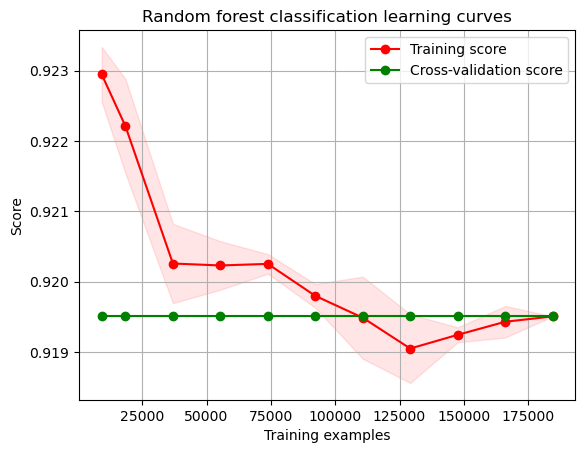

In [24]:
# plot learning curve and evaluate the performance of the best rfm setting
rfc_best = RandomForestClassifier(n_estimators=130, max_depth=3, random_state=1)
rfc_learning_curve = plot_learning_curve(rfc_best, "Random forest classification learning curves", 
                                         X_train, Y_train, cv = 5, 
                                         train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

It can be seen from the figure that when the training samples increase, the scores of training and cross-validation converge towards the same limit, and the scores perform well. This means that the predictive model is neither overfit nor underfit.

In [25]:
# test the prediction performance using the X-train dataset
rfc_best.fit(X_train, Y_train)
Y_predict = rfc_best.predict_proba(X_test)[:,1]
print(Y_predict)
print(rfc_best.classes_)
print(roc_auc_score(Y_test, Y_predict))

[0.0613317  0.10206333 0.08283942 ... 0.10766451 0.05768396 0.08753066]
[0 1]
0.6435393455152716


In [26]:
# Print out the ro curve for reference
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
result = pd.DataFrame([thresholds,tpr,fpr], index= ['threshold','TPR','FPR']) 
print(result)

              0         1         2         3         4         5      \
threshold  1.128805  0.128805  0.128554  0.128167  0.126085  0.125986   
TPR        0.000000  0.000000  0.000000  0.000000  0.000000  0.000160   
FPR        0.000000  0.000028  0.000057  0.000085  0.000156  0.000156   

              6         7         8         9      ...     19132     19133  \
threshold  0.125809  0.125250  0.124890  0.124564  ...  0.052383  0.052345   
TPR        0.000160  0.000479  0.000479  0.000799  ...  1.000000  1.000000   
FPR        0.000198  0.000198  0.000212  0.000212  ...  0.999334  0.999561   

              19134     19135     19136     19137     19138     19139  \
threshold  0.052326  0.052288  0.052224  0.050992  0.050955  0.050859   
TPR        1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
FPR        0.999589  0.999632  0.999660  0.999830  0.999858  0.999901   

              19140     19141  
threshold  0.050782  0.050456  
TPR        1.000000  1.000000  
FPR  

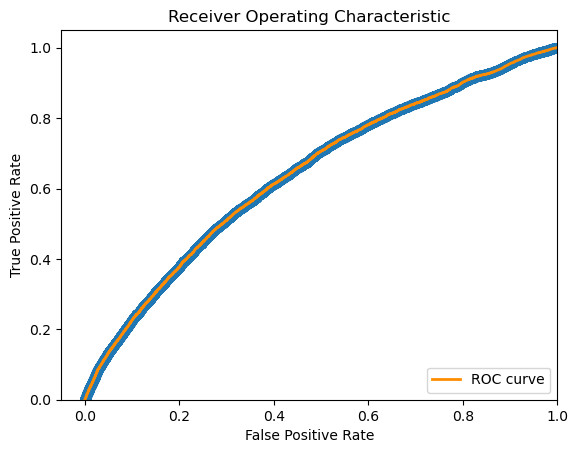

In [27]:
plt.figure() 
plt.scatter(fpr, tpr) 
# plot the roc curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve') 
plt.xlim([-0.05, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic') 
plt.legend(loc="lower right") 

In [31]:
# print out the feature importance
feature_importance_df = pd.DataFrame(data=rfc_best.feature_importances_, index=rfc_best.feature_names_in_)
feature_importance_df.sort_values(0, ascending=False, inplace=True)
feature_importance_df.head(50)

,0
EMPLOYMENT_YEAR_0-5,0.105865
AGE_GROUP_50 above,0.097083
NAME_INCOME_TYPE_Working,0.079724
AGE_GROUP_20-30,0.062190
NAME_EDUCATION_TYPE_Higher education,0.056401
CODE_GENDER_F,0.045609
CODE_GENDER_M,0.043653
NAME_EDUCATION_TYPE_Secondary / secondary special,0.043646
REGION_RATING_CLIENT_3,0.041622
REG_CITY_NOT_WORK_CITY_0,0.039913
